# Monitor Timeline

This notebooks plots a timeline of the three week data collection phase observation of CO2 concetrations in the Large (A) meeting room.

Collected data from 25/04/24 to 05/05/24

* _Input:_ Exported .csv from Aircheq logged files.
* _Output:_ Saves a plot in .png format to disk

**Tasks:** 
* Loads the .csv files
* Removes irrelevant sensor data
* Plots the C02 concentrations in a timeline

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [66]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [67]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

### Import the packages into the project

In [68]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.dates import HourLocator, DateFormatter
import numpy as np
import pandas as pd
import datetime


## Clean-up

### Load the full CSV

In [69]:
def import_csv(file):
    df = pd.read_csv(file, sep=',') 
    return df

file = 'monitor-data/room-a_monitor_week_data.csv'

df= import_csv(file)

# Convert 'Date and time' column to datetime
df['Date and time'] = pd.to_datetime(df['Date and time'], format='%Y/%m/%d %H:%M')

# Split 'Date and time' into separate 'Date' and 'Time' columns
df['Date'] = df['Date and time'].dt.date
df['Time'] = df['Date and time'].dt.time

# Remove the original 'Date and time' column
df.drop(columns=['Date and time'], inplace=True)

# Keep only the 'CO2' column
df = df[['Date', 'Time', 'CO2']]

# Filter out only opening hours (8am to 10pm)
df_filtered_hours = df[(df['Time'] >= datetime.time(8, 0, 0)) & (df['Time'] <= datetime.time(22, 0, 0))]

# Print filtered DataFrame
print(df_filtered_hours)

            Date      Time  CO2
23    2024-05-05  22:00:00  405
24    2024-05-05  21:55:00  404
25    2024-05-05  21:50:00  404
26    2024-05-05  21:45:00  406
27    2024-05-05  21:40:00  405
...          ...       ...  ...
2482  2024-04-26  08:20:00  461
2483  2024-04-26  08:15:00  436
2484  2024-04-26  08:10:00  434
2485  2024-04-26  08:05:00  435
2486  2024-04-26  08:00:00  436

[1525 rows x 3 columns]


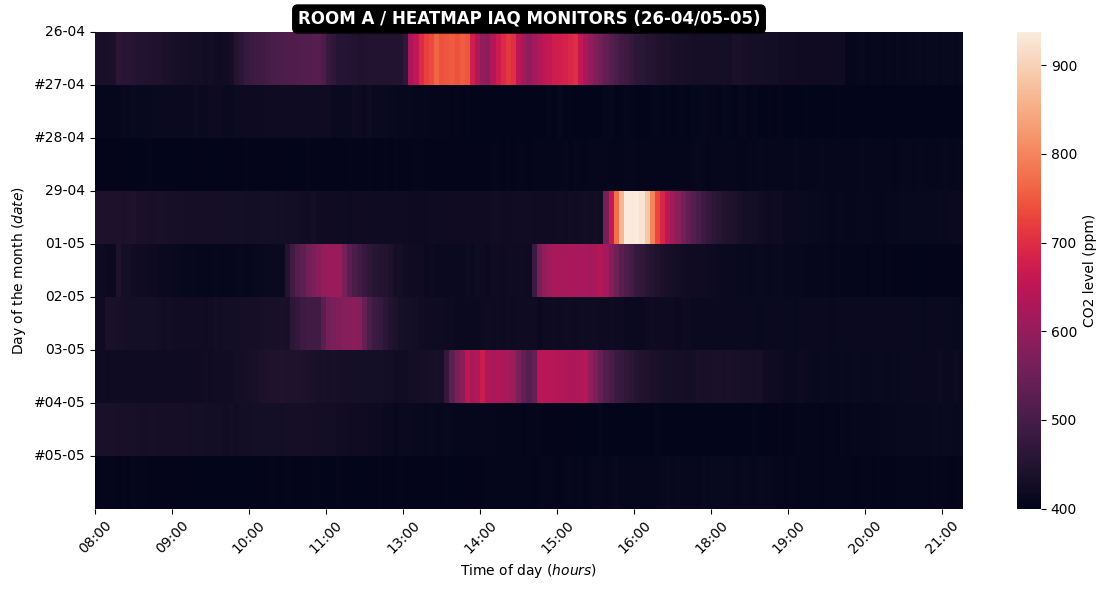

In [85]:
# Strip leading spaces from column names
df_filtered_hours.columns = df_filtered_hours.columns.str.strip()

# Drop duplicate entries
df_filtered_hours = df_filtered_hours.drop_duplicates(subset=['Date', 'Time'])

# Pivot the DataFrame
heatmap_data = df_filtered_hours.pivot(index='Date', columns='Time', values='CO2')

# Plot the heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(heatmap_data, cmap='rocket', cbar_kws={'label': 'CO2 level (ppm)'})

# Set title and labels
title = plt.title('Room A - Heatmap / IAQ monitors (26-04/05-05)'.upper(), fontweight="bold" )
title.set_position([.5, 0.6])  # Adjust the title position
title.set_color('white')  # Set title text color to white
title.set_bbox(dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.3'))  # Set title background color to black
plt.xlabel('Time of day (${hours}$)')
plt.ylabel('Day of the month (${date}$)')

# Customize x-axis ticks to display hours only
hour_ticks = range(0, len(heatmap_data.columns), 15)  # Adjust the step size as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xticks(hour_ticks, [col.strftime('%H:00') for col in heatmap_data.columns[hour_ticks]])

# Reformat y-axis ticks to show day and month only
plt.yticks(range(len(heatmap_data.index)), [f"#{date.strftime('%d-%m')}" if date.strftime('%d-%m') in ['27-04', '28-04', '04-05', '05-05'] else date.strftime('%d-%m') for date in heatmap_data.index])

# Make the labels for 27-04 and 28-04 a different color
for i, label in enumerate(heatmap.yaxis.get_ticklabels()):
    if label.get_text() in ['27-04', '28-04', '04-05', '05-05']:
        label.set_color('lightgrey')

plt.tight_layout()

# Save the chart to disk
plt.savefig('monitor-charts/room-a-monitor-heatmap.png', dpi=300, bbox_inches='tight')

plt.show()